### Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
from sqlalchemy import create_engine
from sqlalchemy.engine import URL
import os
from dotenv import load_dotenv
from matplotlib.dates import DayLocator

In [2]:
## Importando variáveis
load_dotenv()

connUrl = URL.create(
    "mssql+pyodbc",
    host = os.environ.get('DB_HOST'),
    database = os.environ.get('DATABASE'),
    username = os.environ.get('DB_USR'),
    password = os.environ.get('DB_PASS'),
    query = {
        "driver": "ODBC Driver 18 for SQL Server",
        "TrustServerCertificate": "yes"      
    }
)

engine = create_engine(connUrl)

In [3]:
maquinas = pd.read_sql(
    """
    SELECT
         maquina,
         LEFT(rdt,10) AS data,
         eixo,
         torque,
         temperatura,
         vibracao,
         pressao
        FROM maquinas
        WHERE eixo <> 'Magazine' and eixo <> 'B'
        ORDER BY rdt ASC
    """,
    engine
)

In [4]:
maquinas

,maquina,data,eixo,torque,temperatura,vibracao,pressao
0,M00432,2023-07-21,Spindle,7.537789,102.291122,2.121372,64.270447
1,M00432,2023-07-21,X,3.054814,38.037018,1.025554,64.527374
2,M00432,2023-07-21,Y,13.675704,54.596870,3.690912,65.013481
3,M00432,2023-07-21,Z,4.122539,38.342598,1.176040,65.026909
4,M00433,2023-07-21,Spindle,8.092338,91.643005,2.165652,64.448914
...,...,...,...,...,...,...,...
29028,M00857,2025-08-23,Z,5.570493,43.797153,1.531150,64.678246
29029,M00856,2025-08-23,Z,6.747095,46.270798,1.806726,63.991158
29030,M00851,2025-08-23,Z,5.182936,44.389759,1.619674,64.879150
29031,M00840,2025-08-23,Z,4.172271,41.188805,1.198877,65.351608


In [5]:
maquinas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29033 entries, 0 to 29032
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maquina      29033 non-null  object 
 1   data         29033 non-null  object 
 2   eixo         29033 non-null  object 
 3   torque       29033 non-null  float64
 4   temperatura  29033 non-null  float64
 5   vibracao     29033 non-null  float64
 6   pressao      29033 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


### Analise unidimensional das variáveis

In [6]:
## Frequência de máquinas

maquinas.maquina.value_counts()

maquina
M00442    1982
M00444    1982
M00451    1982
M00452    1982
M00433    1981
M00443    1981
M00432    1978
M00453    1978
M00456    1974
M00434    1890
M00836    1170
M00851    1165
M00857    1150
M00856    1062
M00838     945
M00839     943
M00837     942
M00853     667
M00854     667
M00840     612
Name: count, dtype: int64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


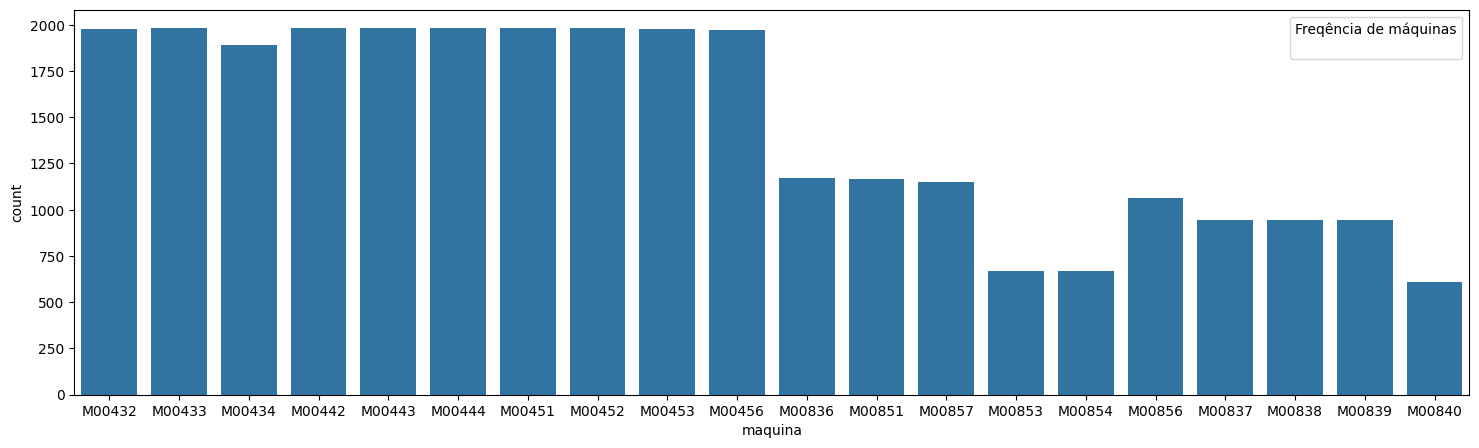

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 5))
sns.countplot(x='maquina', data=maquinas)
plt.legend(title='Freqência de máquinas', labelspacing=1.2)
plt.show()

In [8]:
### Analise de torque

maquinas.groupby('maquina')['torque'].mean()

maquina
M00432     6.835259
M00433     7.504227
M00434     8.292265
M00442     7.307244
M00443     6.000305
M00444     6.676351
M00451     6.547657
M00452     6.385699
M00453     7.337815
M00456     5.551252
M00836     6.737332
M00837     7.603891
M00838     6.336053
M00839     8.035822
M00840     6.783971
M00851     7.524691
M00853    10.158042
M00854     8.793099
M00856     8.727755
M00857    11.107080
Name: torque, dtype: float64

In [9]:
maquinas.torque.value_counts().sort_index

<bound method Series.sort_index of torque
2.235223    2
2.360094    2
2.481607    2
3.028734    2
2.508856    2
           ..
2.231138    1
3.012670    1
2.392274    1
2.050006    1
3.582849    1
Name: count, Length: 28985, dtype: int64>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


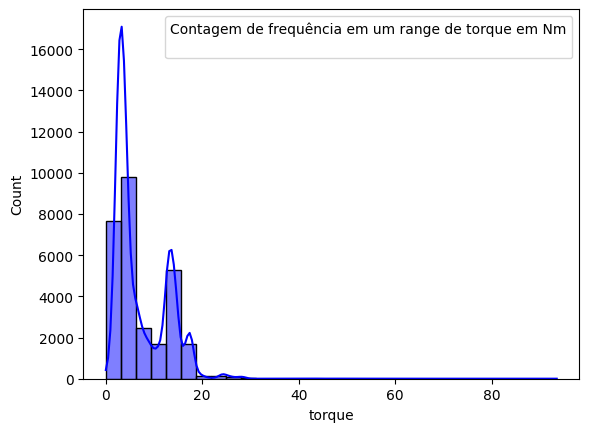

In [10]:
sns.histplot(maquinas, x='torque', bins=30, color='blue', kde=True, stat='count')
plt.legend(title='Contagem de frequência em um range de torque em Nm', labelspacing=1.2)
plt.show()

In [11]:
## Análise de vibração

maquinas.vibracao.value_counts().sort_index

<bound method Series.sort_index of vibracao
1.169198    3
0.917297    3
0.912233    2
1.117135    2
1.300533    2
           ..
3.623751    1
3.433895    1
3.404980    1
0.934932    1
1.118153    1
Name: count, Length: 28837, dtype: int64>

In [12]:
maquinas.groupby('maquina')['vibracao'].mean().sort_index

<bound method Series.sort_index of maquina
M00432    1.903076
M00433    2.080007
M00434    2.278921
M00442    2.053672
M00443    1.749321
M00444    1.887020
M00451    1.822875
M00452    1.798226
M00453    2.022102
M00456    1.602378
M00836    1.863937
M00837    2.072830
M00838    1.823078
M00839    2.169005
M00840    1.945198
M00851    2.094886
M00853    2.685958
M00854    2.380257
M00856    2.371570
M00857    2.972009
Name: vibracao, dtype: float64>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


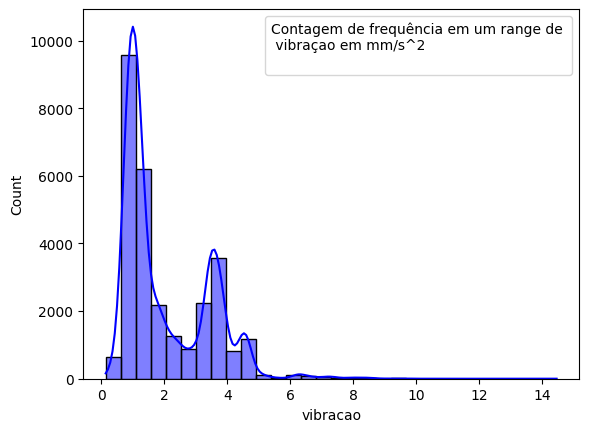

In [13]:
sns.histplot(maquinas, x='vibracao', bins=30, color='blue', kde=True, stat='count')
plt.legend(title='Contagem de frequência em um range de \n vibraçao em mm/s^2', labelspacing=1.2)
plt.show()

In [14]:
## Analise de temperatura

maquinas.temperatura.value_counts().sort_index

<bound method Series.sort_index of temperatura
0.000000     107
36.284245      2
50.350693      2
39.079914      2
40.773697      2
            ... 
38.901363      1
40.909393      1
35.456383      1
38.992165      1
41.759354      1
Name: count, Length: 28865, dtype: int64>

In [15]:
maquinas.groupby('maquina')['temperatura'].mean()

maquina
M00432    53.055046
M00433    50.302164
M00434    46.851870
M00442    44.701756
M00443    46.132807
M00444    47.860671
M00451    42.800241
M00452    47.080827
M00453    44.913679
M00456    45.207107
M00836    51.434979
M00837    50.813630
M00838    48.063921
M00839    53.539780
M00840    52.744975
M00851    56.151855
M00853    54.459572
M00854    60.390175
M00856    51.565814
M00857    57.953275
Name: temperatura, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


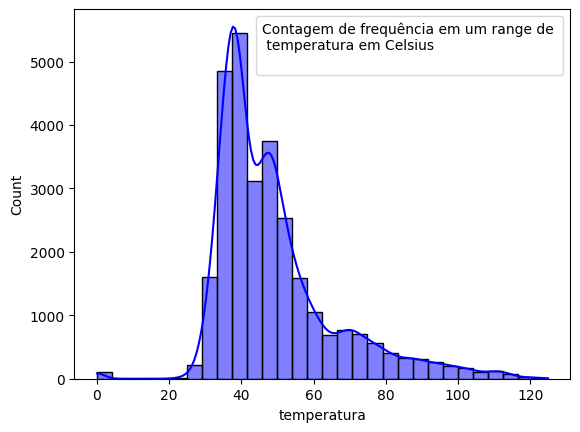

In [16]:
sns.histplot(maquinas, x='temperatura', bins=30, color='blue', kde=True, stat='count')
plt.legend(title='Contagem de frequência em um range de \n temperatura em Celsius', labelspacing=1.2)
plt.show()

In [17]:
### Análise da pressão do líquido de corte e arrefecimento

maquinas.pressao.value_counts().sort_index

<bound method Series.sort_index of pressao
65.186234    4
64.857307    3
65.048714    3
65.642097    3
64.862366    3
            ..
65.414650    1
65.242607    1
65.451103    1
65.266685    1
64.288521    1
Name: count, Length: 27344, dtype: int64>

In [18]:
maquinas.groupby('maquina')['pressao'].mean().sort_index

<bound method Series.sort_index of maquina
M00432    64.603734
M00433    64.655459
M00434    64.314431
M00442    64.563382
M00443    64.409933
M00444    64.792595
M00451    64.893157
M00452    64.467716
M00453    64.587416
M00456    64.567064
M00836    64.692679
M00837    64.050766
M00838    64.819438
M00839    63.611212
M00840    64.285935
M00851    63.646782
M00853    62.296500
M00854    62.938017
M00856    63.570292
M00857    64.030757
Name: pressao, dtype: float64>

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


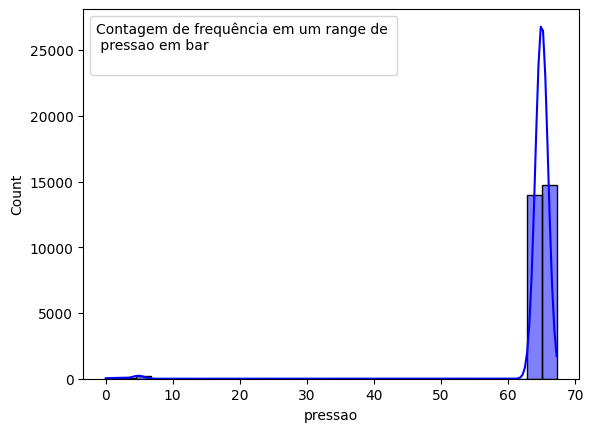

In [19]:
sns.histplot(maquinas, x='pressao', bins=30, color='blue', kde=True, stat='count')
plt.legend(title='Contagem de frequência em um range de \n pressao em bar', labelspacing=1.2)
plt.show()

In [20]:
### Resumo geral das variáveis

maquinas.drop(columns=['maquina', 'data','eixo']).describe()

,torque,temperatura,vibracao,pressao
count,29033.000000,29033.000000,29033.000000,29033.000000
mean,7.266839,49.043373,2.020315,64.355769
std,5.528162,16.623711,1.370443,6.292103
min,0.035858,0.000000,0.140439,0.027149
25%,3.094008,37.746037,0.975532,64.653252
50%,4.455795,44.840908,1.315359,65.000565
75%,12.644730,54.374744,3.349643,65.338226
max,93.507751,124.907913,14.451904,67.232460


### Analise de correlação das variáveis

In [21]:
colunas_corr = maquinas[['torque', 'temperatura', 'vibracao', 'pressao']]
colunas_corr

,torque,temperatura,vibracao,pressao
0,7.537789,102.291122,2.121372,64.270447
1,3.054814,38.037018,1.025554,64.527374
2,13.675704,54.596870,3.690912,65.013481
3,4.122539,38.342598,1.176040,65.026909
4,8.092338,91.643005,2.165652,64.448914
...,...,...,...,...
29028,5.570493,43.797153,1.531150,64.678246
29029,6.747095,46.270798,1.806726,63.991158
29030,5.182936,44.389759,1.619674,64.879150
29031,4.172271,41.188805,1.198877,65.351608


In [22]:
matriz_corr = colunas_corr.corr()
print(matriz_corr)

               torque  temperatura  vibracao   pressao
torque       1.000000     0.457309  0.930654  0.070313
temperatura  0.457309     1.000000  0.451999  0.033319
vibracao     0.930654     0.451999  1.000000  0.069038
pressao      0.070313     0.033319  0.069038  1.000000


### Análise de outliers com o boxplot

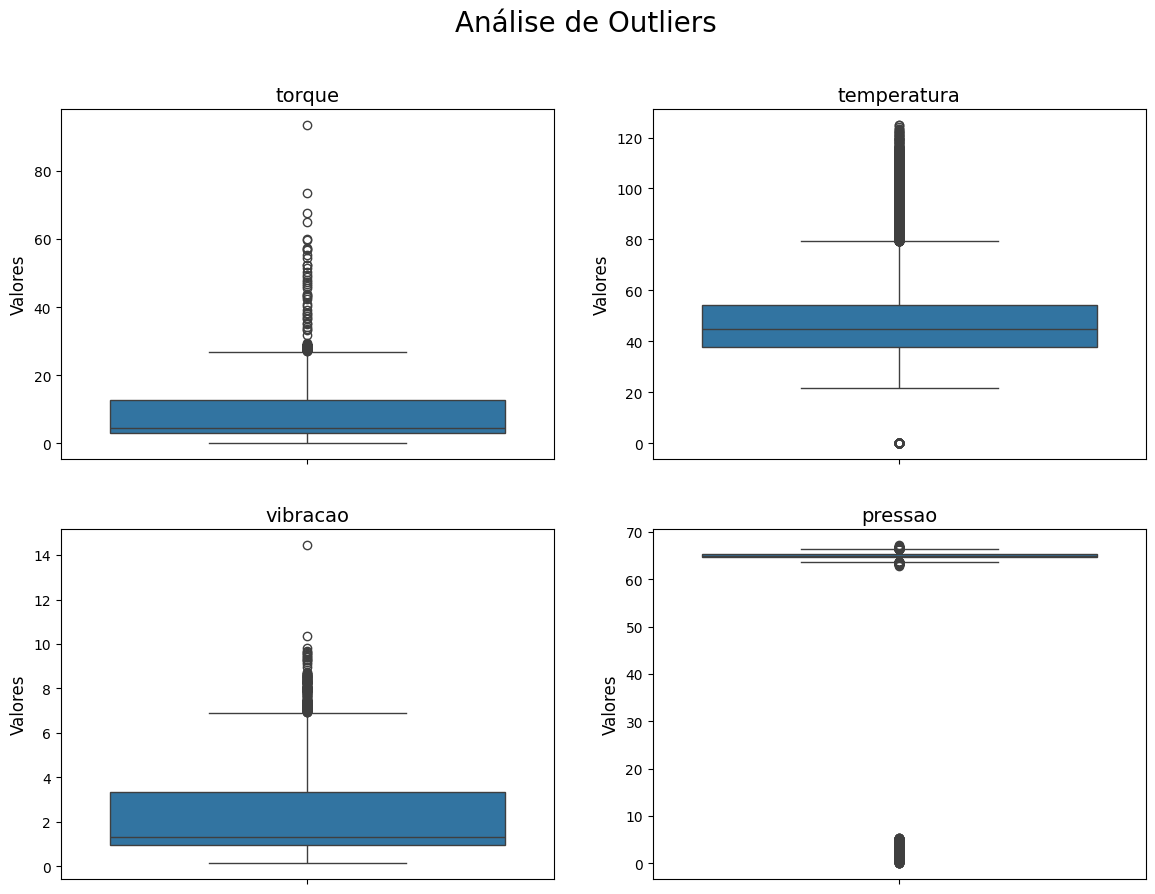

In [23]:
variaveis = ['torque', 'temperatura', 'vibracao', 'pressao']

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes = axes.flatten()

fig.suptitle('Análise de Outliers', fontsize=20)

for i, coluna in enumerate(variaveis):
    sns.boxplot(y=colunas_corr[coluna], ax=axes[i], orient='v')
    axes[i].set_title(f'{coluna}', fontsize=14)
    axes[i].set_ylabel('Valores', fontsize=12)
    axes[i].set_xlabel('')

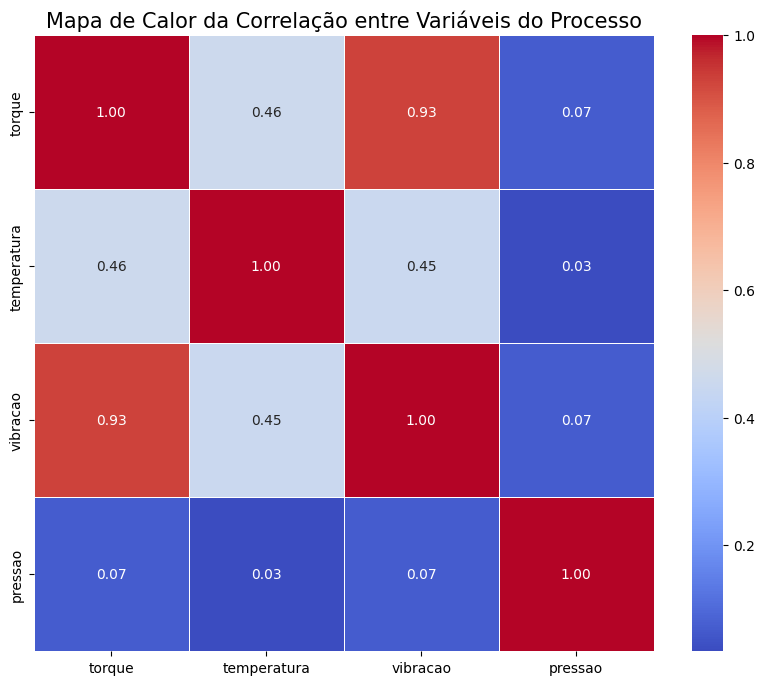

In [24]:
### Exibição gráfica do resultado da matriz em heatmap

plt.figure(figsize=(10,8))
sns.heatmap(
    matriz_corr,
    annot=True,       
    cmap='coolwarm',  
    fmt=".2f",        
    linewidths=.5
)
plt.title('Mapa de Calor da Correlação entre Variáveis do Processo', fontsize=15)
plt.show()

Aqui nós observamos uma forte relação entre torque e vibração. Oque faz total sentido.
Validaremos sua relação, graficamente, em um scatterplot.

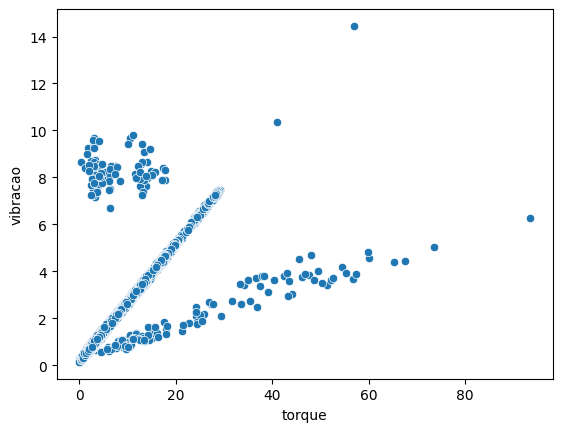

In [25]:
ax = sns.scatterplot(data=maquinas, x='torque', y='vibracao')


Além da correlação positiva entre torque e vibração.

É possível observar uma grande anomalia entre a faixa 0-20 de torque, bem como um ponto disperso alto do esforço da máquina de +80.

E uma vibração desproporcional a partir de "40nm"m em que o equipamento se torna mais instável a partir dessa faixa.

### Análise das variáveis categóricas de data e eixos pela relação Torque vs. Vibração

Essa análise irá permitir a visualização da evolução do desempenho da máquina ao londo do tempo. Com isso, iremos detectar a degradação. A vibração para o mesmo nível de torque está
aumentando com o passar dos dias, semanas e meses?

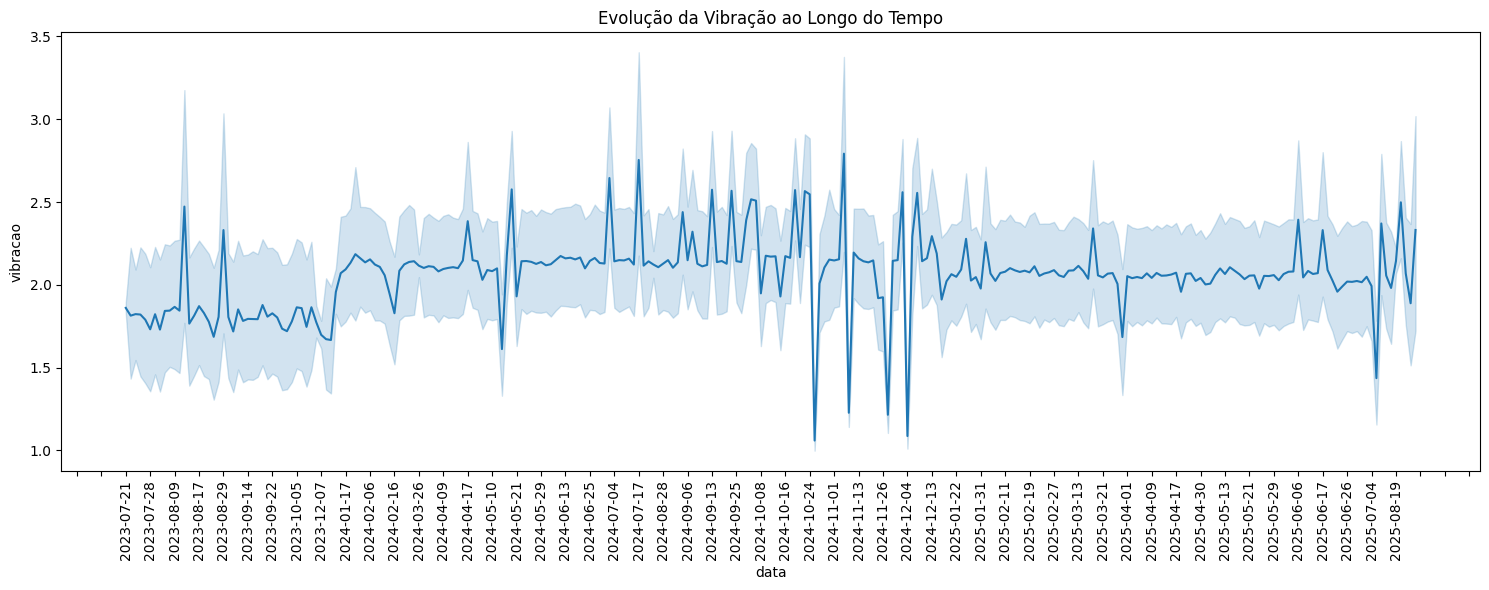

In [26]:
# Analisando a vibração ao longo do tempo

plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=maquinas, x='data', y='vibracao')
plt.title('Evolução da Vibração ao Longo do Tempo')

## Formatando o eixo X para ficar mais visível

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(DayLocator(interval=5))
plt.tight_layout() 
plt.show()

É nítido que os maiores picos de vibração ocorreram entre "30-10-2024" e "06-12-2024"

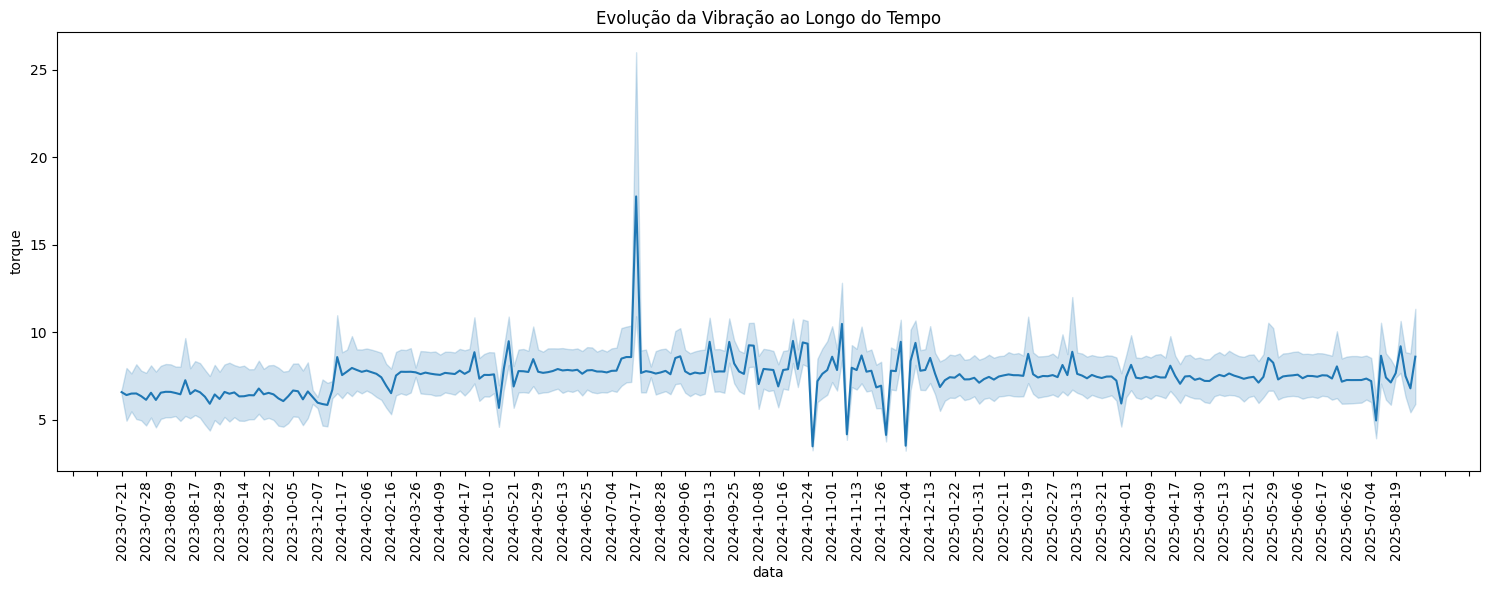

In [27]:
# Análise de torque da máquina

plt.figure(figsize=(15, 6))
ax = sns.lineplot(data=maquinas, x='data', y='torque')
plt.title('Evolução da Vibração ao Longo do Tempo')

## Formatando o eixo X para ficar mais visível

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(DayLocator(interval=5))
plt.tight_layout() 
plt.show()

Já com o torque, percebemos que ele se manteve estável maior parte do tempo, exceto pelo pico de esforço entre '12-07-2024' e '25-08-2024'

### Validação de hipótese de esforço e vibração dos eixos

Segundo o PCM e operadores, o eixo que mais exerce esforço para a usinagem do bloco é o X.

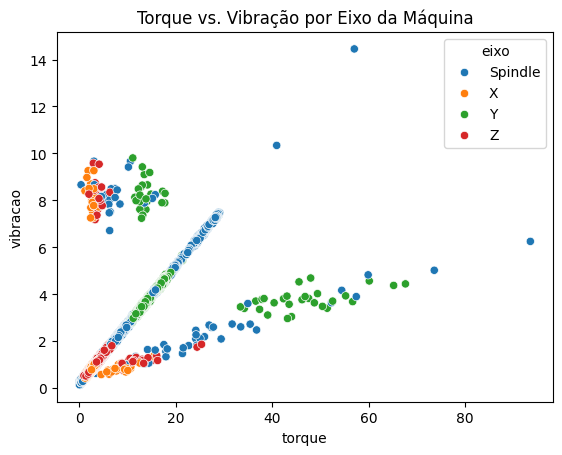

In [28]:
## Qual eixo exerce mais esforço vs. vibração?

sns.scatterplot(data=maquinas, x='torque', y='vibracao', hue='eixo')
plt.title('Torque vs. Vibração por Eixo da Máquina')
plt.show()

É possível observar uma frequência e concentração maior do spindle(Onde a ferramenta de usinagem é encaixada) e do eixo Y.

Além de ser um indicativo de esforço e desgaste da máquina, também é um indicativo de esforço devido ao desgaste da ferramenta de usinagem acoplada no spindle.

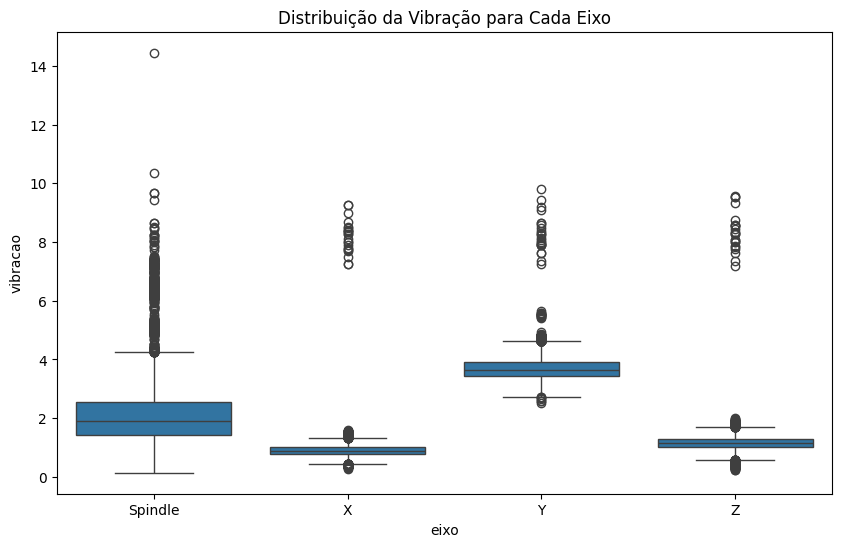

In [29]:
## Comparando distribuição. Qual eixo vibra mais, em média?

plt.figure(figsize=(10, 6))
sns.boxplot(data=maquinas, x='eixo', y='vibracao')
plt.title('Distribuição da Vibração para Cada Eixo')
plt.show()

Aqui concluímos que a maior vibração típica ocorre no eixo Y. Entretando, o spindle é o que mais sofre com eventos extremos de vibração.

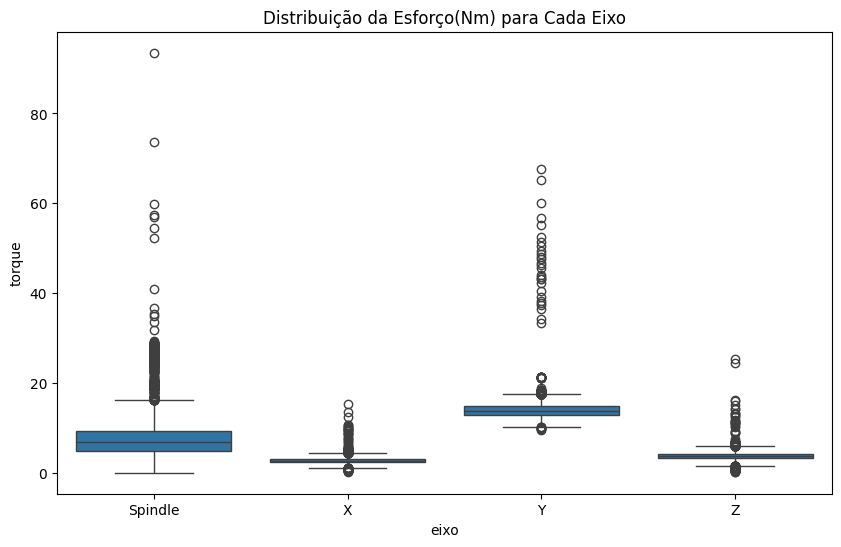

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=maquinas, x='eixo', y='torque')
plt.title('Distribuição da Esforço(Nm) para Cada Eixo')
plt.show()

É possível observar uma similaridade com o gráfico de vibração. Assim como o primeiro gráfico, concluímos que o eixo Y opera em esforço maior parte do tempo. Entretanto, é o spindle que se destaca com eventos extremos.

Isso sugere uma forte relação de causa e efeito: os picos de vibração que vimos antes no Spindle são muito provavelmente causados por estes picos de torque (ou ocorrem simultaneamente). 
Quando o Spindle precisa realizar um esforço súbito e extremo (como no início de um corte, por exemplo), ele vibra violentamente.

### Construção do modelo de detecção de anomalia